# Dfsu - Connectivity

In [1]:
import mikeio

<AxesSubplot:title={'center':'Bathymetry'}>

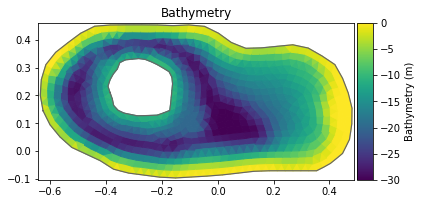

In [3]:
ds = mikeio.read("../tests/testdata/FakeLake.dfsu")
ds.geometry.plot()

The info on the connectivity between nodes and elements can be found in the element table

In [4]:
et = ds.geometry.element_table
len(et)

1011

In [5]:
et[0]

array([7, 6, 0, 1])

I.e. node nr 7,6, 0 ,1 are members of element 0.

Let's find out if any of these nodes are also found in another element, this would imply that these elements are neigbours (adjacent).

In [9]:
for i, e in enumerate(et):
    for n in et[0]:
        if n in e:
            print(f"Node: {n} found in element {i}")

Node: 7 found in element 0
Node: 6 found in element 0
Node: 0 found in element 0
Node: 1 found in element 0
Node: 6 found in element 1
Node: 0 found in element 1
Node: 7 found in element 2
Node: 1 found in element 2
Node: 6 found in element 5
Node: 6 found in element 8
Node: 7 found in element 9
Node: 6 found in element 9
Node: 7 found in element 10
Node: 7 found in element 11


This information can be encoded in a connectivity matrix, and since each element is only connected to a few other elements, this will be a very sparse matrix, which is why we will store this info in a suitable sparse matrix structure from [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html).

In [12]:
from scipy.sparse import lil_matrix

In [14]:
ne = ds.geometry.n_elements

In [13]:
nodetable = {}
for el in range(ds.geometry.n_elements):
    nodes = et[el]

    for node in nodes:
        if node in nodetable:
            nodetable[node].append(el)
        else:
            nodetable[node] = [el]

In [20]:
nodetable[7]

[0, 2, 9, 10, 11]

In [16]:
def is_neighbour(a, b) -> bool:
    return len(set(a).intersection(set(b))) == 2

In [23]:
et[0]

array([7, 6, 0, 1])

In [24]:
et[2]

array([1, 2, 8, 7])

In [25]:
is_neighbour(et[0], et[2])

True

In [26]:
is_neighbour(et[0], et[100])

False

In [30]:
# create table with neighbours
ec = {}
for el in range(ne):
    nodes = et[el] # nodes in this element

    for n in nodes:
        elements = nodetable[n] # elements that has this node 
        for e in elements:
            if is_neighbour(et[el], et[e]):
                if el in ec:
                    if e not in ec[el]:
                        ec[el].append(e)
                else:
                    ec[el] = [e]

       

In [32]:
# Create sparse connectivity matrix
C = lil_matrix((ne, ne))
for i in range(ne):
    row = ec[i]
    for j in row:
        C[i, j] = 1

In [33]:
C

<1011x1011 sparse matrix of type '<class 'numpy.float64'>'
	with 3358 stored elements in List of Lists format>

In [36]:
C[0,0] # Self connection are not included

0.0

In [37]:
C[0,2] # Element 0 and 2 are connected

1.0

In [ ]:
# To be continued....